# ORIE 4580/5580/5581 Assignment 3

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [9]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [10]:
# Functions to visualize LCG sequence on clock (see demo notebook)

def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

In [11]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)


def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

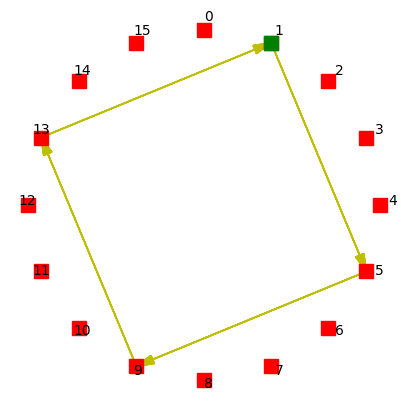

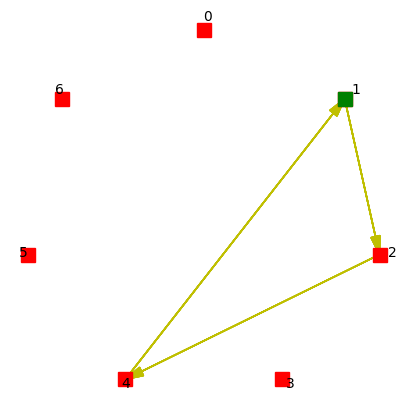

In [12]:
# Ans

# Ans

#LCG xn (1)

m1 = 16
a1 = 5
c1 = 0
seed1 = 1

fig1 = plt.figure(figsize=(5,5))
x1 = LCG(n=m1+1,m=m1,a=a1,c=c1,seed = seed1)

plot_clock_face(m1,fig1,annotate = True)
plot_clock_path(m1,x1,fig1)
#plt.axis('equal')
plt.axis('off')
plt.show()

#LCG yn (2)

m2 = 7
a2 = 2
c2 = 0
seed2 = 1

fig2 = plt.figure(figsize=(5,5))
x2 = LCG(n=m1+1,m=m2,a=a2,c=c2,seed = seed2)

plot_clock_face(m2,fig2,annotate = True)
plot_clock_path(m2,x2,fig2)
#plt.axis('equal')
plt.axis('off')
plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

In [7]:
print((x1[1] * (m1 +1)))

6.0


3.0


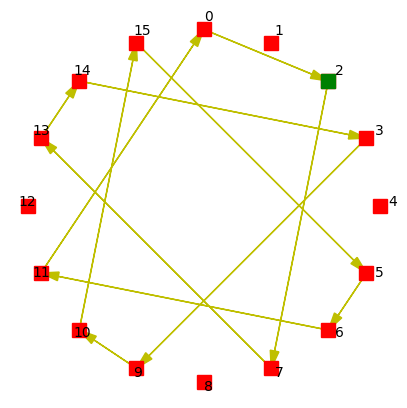

In [13]:
#LCG zn = yn + xn (2)


def sum(a1, m1, x0, a2, m2, period):
    m = max(m1, m2)
    x = x0
    y = x0
    z = np.zeros(period + 1)

    for i in range(period + 1):
        z[i] = (x + y + 1) % (m + 1)
        i += 1
        x = ((a1*x) % m1)
        y = ((a2*y) % m2)

    return z
    
a1 = 5
m1 = 16
x0 = 1
a2 = 2
m2 = 7
period = 12
m = max(m1, m2)

z = sum(a1, m1, x0, a2, m2, period)
print(z[0])


fig3 = plt.figure(figsize=(5,5))
plot_clock_face(m,fig3,annotate = True) 
plot_clock_path(m,z,fig2) 
plt.axis('equal') 
plt.axis('off') 
plt.show()



___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

$$
\begin{aligned}
\text{period of } x_{n} &= 4 \\
\text{period of } y_{n} &= 3 \\
\text{period of } z_{n} &= 12
\end{aligned}
$$


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.


### Pseudoinverse of the mixed CDF

We are asked to find the pseudoinverse $F^{-1}(y)$ for
$$
F(x) =
\begin{cases}
0 & x < 0, \\
x & 0 \leq x < \tfrac{1}{2}, \\
\tfrac{1}{2} & \tfrac{1}{2} \leq x < 1, \\
1 & x \geq 1.
\end{cases}
$$

---

**Case 1: $0 \leq y < \tfrac{1}{2}$.**  
On $[0,\tfrac{1}{2})$ we have $F(x) = x$. The condition $F(x) \geq y$ means $x \geq y$.  
The smallest such $x$ is $x=y$.  
Thus $F^{-1}(y) = y$.

**Case 2: $y = \tfrac{1}{2}$.**  
At $x=\tfrac{1}{2}$, $F(x)=\tfrac{1}{2}$, so the infimum is $x=\tfrac{1}{2}$.  
Thus $F^{-1}(\tfrac{1}{2}) = \tfrac{1}{2}$.

**Case 3: $\tfrac{1}{2} < y \leq 1$.**  
For $x \in [\tfrac{1}{2},1)$, $F(x)=\tfrac{1}{2}$, so it never reaches values larger than $\tfrac{1}{2}$.  
The first point where $F(x) \geq y$ is at $x=1$, where $F(1)=1$.  
Thus $F^{-1}(y)=1$.

---

**Final Answer:**

$$
F^{-1}(y) =
\begin{cases}
y & 0 \leq y < \tfrac{1}{2}, \\
\tfrac{1}{2} & y = \tfrac{1}{2}, \\
1 & \tfrac{1}{2} < y \leq 1.
\end{cases}
$$

---

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

#### Inversion algorithm for Geometric(p) distribution

 Step 1: Let U ~ Uniform(0,1).
 Step 2: The CDF of Geometric(p) with support {1,2,...} is
 $$F(k) = 1 - (1-p)^k.$$
Step 3: Solve for k such that
$$U \leq F(k).$$
Step 4: Rearranging,
 $$U \leq 1 - (1-p)^k \quad \iff \quad (1-p)^k \leq 1 - U.$$
 Step 5: Taking logs,
 $$k \geq \frac{\ln(1-u)}{\ln(1-p)}.$$
 Step 6: Therefore, the inversion formula is
 $$X = \left\lceil \frac{\ln(1-u)}{\ln(1-p)} \right\rceil.$$

This generates samples from Geometric(p) with pmf
 $$P(X=k) = p (1-p)^{k-1}, \quad k \in \{1,2,\dots\}.$$

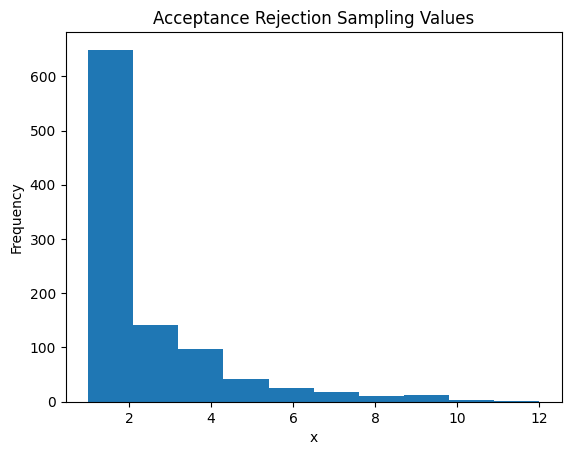

In [3]:
u = np.random.uniform(0, 1, 1000)
x = 1 + np.floor(np.log(1 - u) / np.log(1 - 0.42))
plt.hist(x)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Acceptance Rejection Sampling Values')
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

### Inversion Algorithm for $X$

The pdf of $X$ is
$$
f(x) =
\begin{cases}
e^{x-2}, & 0 \leq x \leq 2, \\
e^{-x}, & x > 2, \\
0, & \text{otherwise}.
\end{cases}
$$

---

**Step 1: Compute the CDF.**

For $0 \leq x \leq 2$:
$$
F(x) = \int_0^x e^{t-2}\,dt = e^{x-2} - e^{-2}.
$$

For $x > 2$:
$$
F(x) = F(2) + \int_2^x e^{-t}\,dt
= (1 - e^{-2}) + (e^{-2} - e^{-x})
= 1 - e^{-x}.
$$

---

**Step 2: Invert the CDF.**


Let $U \sim \text{Uniform}(0,1)$.

- If $0 \leq U \leq 1 - e^{-2}$, solve
$$
U = e^{x-2} - e^{-2}
\quad \Longrightarrow \quad
x = 2 + \ln\big(U + e^{-2}\big).
$$

- If $1 - e^{-2} < U < 1$, solve
$$
U = 1 - e^{-x}
\quad \Longrightarrow \quad
x = -\ln(1-U).
$$

At $U = 1 - e^{-2}$, both formulas give $x = 2$.

---

**Step 3: Algorithm description.**

1. Generate $U \sim \text{Uniform}(0,1)$.
2. If $U \leq 1 - e^{-2}$, set $X = 2 + \ln(U + e^{-2})$.
3. Otherwise, set $X = -\ln(1-U)$.
4. Return $X$.




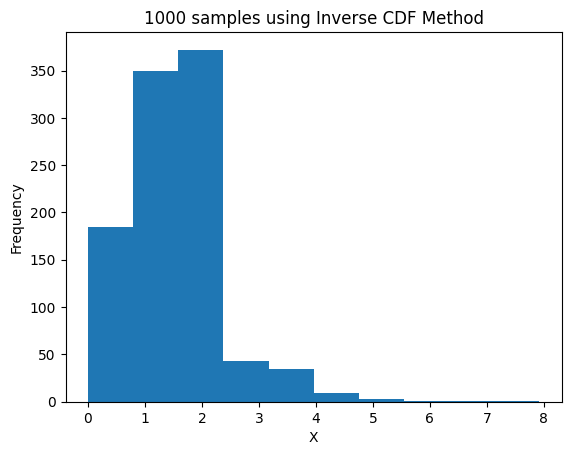

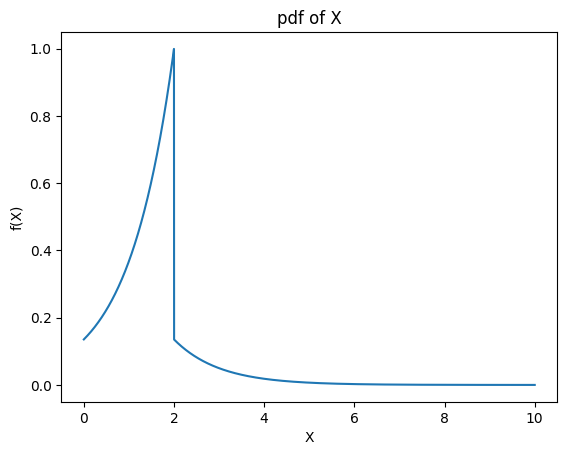

In [15]:
u = np.random.uniform(0, 1, 1000)
threshold = 1 - np.exp(-2)
x = np.empty_like(u)
mask = (u <= threshold)
x[mask] = 2 + np.log(u[mask] + np.exp(-2))
x[~mask] = -np.log(1 - u[~mask])

plt.hist(x)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('1000 samples using Inverse CDF Method')
plt.show()

x = np.linspace(0, 10, 10000)
y = np.empty_like(x)
mask = (x <= 2)
y[mask] = np.exp(x[mask] - 2)
y[~mask] = np.exp(-x[~mask])
plt.plot(x,y)
plt.title('pdf of X')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.show()


<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.


### Acceptance–Rejection Algorithm for Sampling from $f(x)$

We want to sample from the density

$$
f(x) = 
\begin{cases}
\dfrac{5x^4 + 4x^3 + 3x^2 + 1}{4}, & 0 \leq x \leq 1, \\
0, & \text{otherwise}.
\end{cases}
$$

---

**Step 1. Proposal distribution**

Choose $g(x) = 1$ for $0 \leq x \leq 1$ (i.e., $g \sim \text{Uniform}(0,1)$).

---

**Step 2. Find envelope constant**

$$
c = \sup_{0 \leq x \leq 1} \frac{f(x)}{g(x)} = \sup_{0 \leq x \leq 1} f(x).
$$

Since $f(x)$ is increasing on $[0,1]$,

$$

c = f(1) = \frac{5(1)^4 + 4(1)^3 + 3(1)^2 + 1}{4} = \frac{13}{4} = 3.25.
$$

---

**Step 3. Acceptance–Rejection Algorithm**

Repeat until acceptance:

1. Generate $X \sim \text{Uniform}(0,1)$.
2. Generate $U \sim \text{Uniform}(0,1)$.
3. Accept $X$ if
   $$
   U \leq \frac{f(X)}{3.25}.
   $$
   Otherwise, reject and repeat.

---

**Step 4. Acceptance Rate**

$$
\text{Acceptance rate} = \frac{1}{c} = \frac{1}{3.25} \approx 0.3077.
$$


<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.

Since $f(x)$ is already normalized (a proper density on $[0,1]$), the acceptance rate is

$$
\text{Acceptance Rate} = \frac{1}{c}.
$$

Here, $c = \max_{0 \leq x \leq 1} f(x) = f(1) = \tfrac{13}{4} = 3.25$. Therefore,

$$
\text{Acceptance Rate} = \frac{1}{3.25} \approx 0.3077.
$$

Thus, on average about $30.8\%$ of the proposed samples from $g(x) = \text{Uniform}(0,1)$ will be accepted.


<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

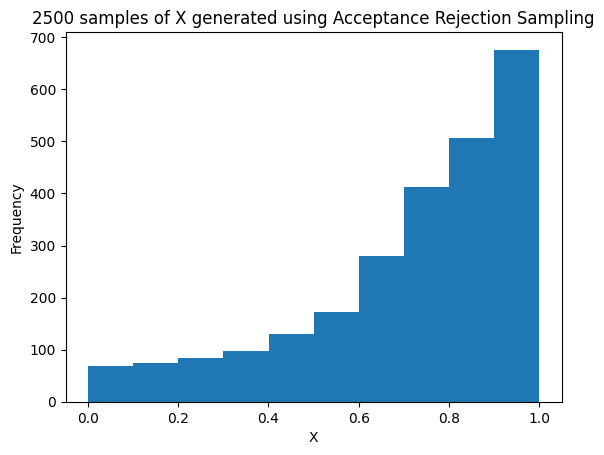

In [6]:
def f_x(x):
    return (5 * x ** 4 + 4 * x ** 3 + 3 * x ** 2 + 1) / 4
samples = []
while len(samples) < 2500:
    u = np.random.uniform(0, 1)
    x = np.random.uniform(0, 1)
    if u <= f_x(x) / 3.25:
        samples.append(x)
samples = np.array(samples)

plt.hist(samples)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('2500 samples of X generated using Acceptance Rejection Sampling')
plt.show()

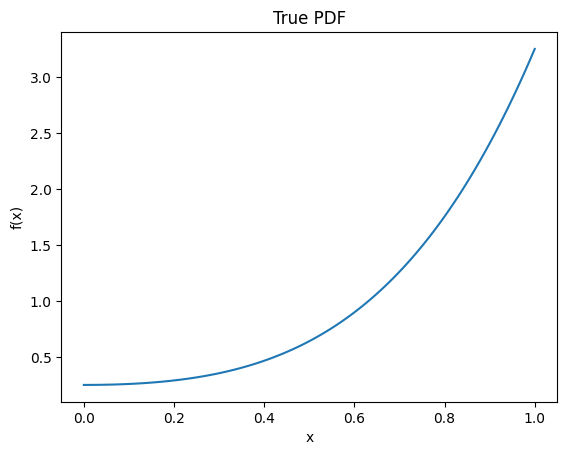

In [7]:
x = np.linspace(0, 1, 100)
f = f_x(x)
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('True PDF')
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

First, let's calculate the CDF of $g(x)$.  
Given that the Laplace distribution includes an absolute value:

$$
g(x) = \tfrac{1}{2} e^{-|x|}
$$

we split into two cases:

- If $x < 0$:
$$
G(x) = \int_{-\infty}^x \tfrac{1}{2} e^{t}\,dt = \tfrac{1}{2} e^{x}.
$$

- If $x \ge 0$:
$$
G(x) = \int_{-\infty}^0 \tfrac{1}{2} e^{t}\,dt + \int_{0}^x \tfrac{1}{2} e^{-t}\,dt
= \tfrac{1}{2} + \left(1 - \tfrac{1}{2} e^{-x} - \tfrac{1}{2}\right)
= 1 - \tfrac{1}{2} e^{-x}.
$$

So the CDF is
$$
G(x) = 
\begin{cases}
\tfrac{1}{2} e^{x}, & x < 0, \\[6pt]
1 - \tfrac{1}{2} e^{-x}, & x \ge 0.
\end{cases}
$$

---

Next, invert $G(x)$ to obtain $G^{-1}(u)$:

$$
G^{-1}(u) =
\begin{cases}
\ln(2u), & 0 < u < \tfrac{1}{2}, \\[6pt]
-\ln\bigl(2(1-u)\bigr), & \tfrac{1}{2} \le u < 1.
\end{cases}
$$

---

**Inverse transform sampling algorithm:**

1. Generate $u \sim U(0,1)$.  
2. If $u < \tfrac{1}{2}$, set $x = \ln(2u)$.  
   Otherwise, set $x = -\ln\bigl(2(1-u)\bigr)$.  

Then $x = G^{-1}(u)$ is a random sample from the Laplace distribution.



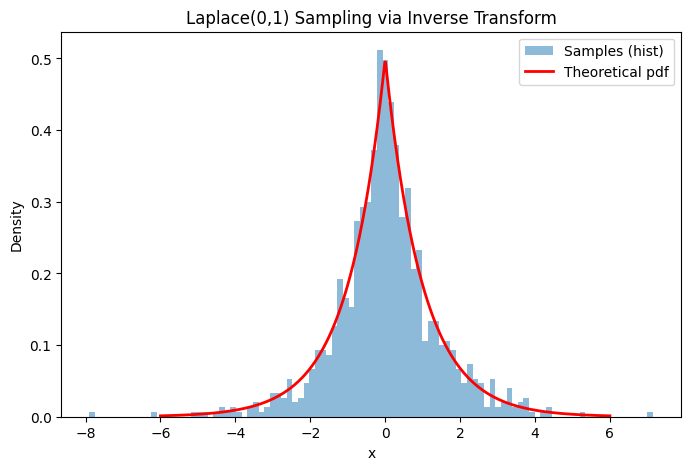

In [15]:
def laplace_inverse_cdf(u: np.ndarray) -> np.ndarray:
    """
    Vectorized inverse CDF (quantile function) for Laplace(0,1).
    u must be in (0,1).
    """
    u = np.asarray(u)
    # Avoid exact 0 or 1 (which would cause log issues)
    eps = np.finfo(float).eps
    u = np.clip(u, eps, 1 - eps)
    return np.where(u < 0.5, np.log(2*u), -np.log(2*(1-u)))

def sample_laplace_inverse(n: int, seed: int | None = None) -> np.ndarray:
    """
    Draw n samples from Laplace(0,1) using inverse transform sampling.
    """
    rng = np.random.default_rng(seed)
    u = rng.random(n)  # u ~ U(0,1)
    return laplace_inverse_cdf(u)

# --- Example usage ---
n = 1000
samples = sample_laplace_inverse(n, seed=123)

# Plot histogram vs. theoretical pdf
x = np.linspace(-6, 6, 600)
pdf = 0.5 * np.exp(-np.abs(x))   # Laplace(0,1) pdf

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=100, density=True, alpha=0.5, label="Samples (hist)")
plt.plot(x, pdf, "r-", lw=2, label="Theoretical pdf")
plt.title("Laplace(0,1) Sampling via Inverse Transform")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

In [16]:
### Ans.

import numpy as np
import matplotlib.pyplot as plt

# --- Target density: standard normal ---
def p(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# --- Proposal density: Laplace(0,1) ---
def q(x):
    return 0.5 * np.exp(-np.abs(x))

# --- Compute minimal k = sup_x p(x)/q(x) ---
def optimal_k():
    xs = np.linspace(-10, 10, 20001)
    ratio = p(xs) / q(xs)
    return np.max(ratio)

k_star = optimal_k()
print("Optimal k =", k_star)



Optimal k = 1.315489246958914


Now that we are able to generate $U[0,1]$, we can generate a sample for 
$g(x)$ (Laplace distribution) using the inverse CDF $G^{-1}(u)$ with $u$ 
(referred to as $y$).  

Next, we generate another $U[0,1]$ for the acceptance–rejection method.

If
$$
u < \frac{p(y)}{k q(y)},
$$
we accept $(x, p(x))$ as a valid point that is enclosed by the pdf $p(x)$.  

Else, we return to the beginning step of generating the first $U[0,1]$ and repeat the process until the generated sample for $p(y)$ is accepted.

---

Repeating this process over many samples for $p(x)$ will yield the true $p(x)$ with probability $1$ as the number of samples approaches infinity.


Using inverse transform, the mapping is deterministic, so it always requires  
exactly **1 uniform** from $U[0,1]$ to obtain a sample from $p(x)$.

---

For the acceptance–rejection step:

- The acceptance probability is $\tfrac{1}{k}$.
- The number of trials until acceptance is geometric with mean $k$.
- Each trial consumes **2 uniforms** (one for generating $g(x)$, one for the acceptance check).

Thus, let $T$ denote the total uniforms used. We have the recursion:

$$
\mathbb{E}[T] = 2 \cdot \tfrac{1}{k} \;+\; \bigl(\mathbb{E}[T] + 2\bigr)\Bigl(1 - \tfrac{1}{k}\Bigr).
$$

Solving gives

$$
\mathbb{E}[T] = 2k.
$$

---

**Summary of expected uniforms:**

\
\begin{aligned}
\text{Inverse transform for } p(x): &\quad 1 \\[6pt]
\text{Acceptance–rejection for } q(x): &\quad k \\[6pt]
\textbf{Total uniforms per accepted sample:} &\quad 2k
\end{aligned}
\\


<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

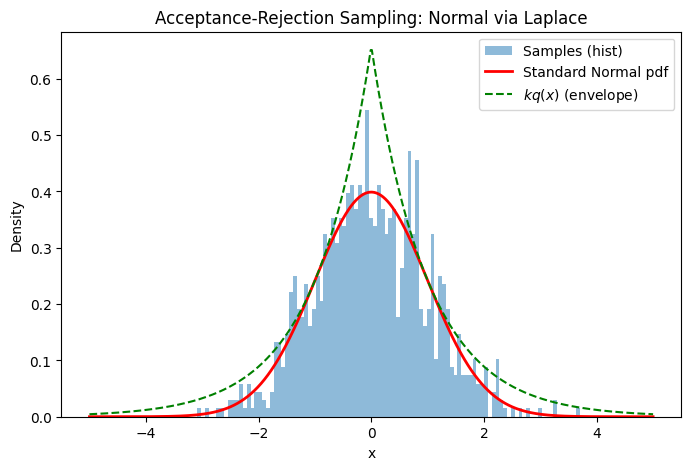

Uniforms per accepted sample : mean = 2.602, 95% CI = (2.527, 2.677)


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# --- Target and proposal (assumed already defined) ---
def p(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

def q(x):
    return 0.5 * np.exp(-np.abs(x))

# Tight envelope constant k* = sqrt(2/pi) * e^{1/2}
k_star = np.sqrt(2/np.pi) * np.exp(0.5)

# --- Acceptance-Rejection Sampler (now also tracks efforts) ---
def sample_normal_via_laplace(n, k=k_star, seed=None):
    rng = np.random.default_rng(seed)
    samples = []
    attempts_per_accept = []   # #proposal attempts used for each accepted sample
    uniforms_per_accept = []   # #uniform(0,1) used for each accepted sample (2 per attempt)

    while len(samples) < n:
        attempts_this_one = 0
        while True:
            # Step 1: sample from Laplace via inverse transform (1 uniform)
            u = rng.random()
            x_prop = np.log(2*u) if u < 0.5 else -np.log(2*(1-u))

            # Step 2: acceptance check (1 uniform)
            u2 = rng.random()
            attempts_this_one += 1

            if u2 <= p(x_prop) / (k * q(x_prop)):
                samples.append(x_prop)
                attempts_per_accept.append(attempts_this_one)
                uniforms_per_accept.append(2 * attempts_this_one)
                break

    return (np.array(samples),
            np.array(attempts_per_accept, dtype=int),
            np.array(uniforms_per_accept, dtype=int))

# --- Example: draw samples ---
n = 1000
samples, attempts_per_accept, uniforms_per_accept = sample_normal_via_laplace(n, k=k_star, seed=42)

# Plot histogram vs. true normal pdf and envelope
x = np.linspace(-5, 5, 500)
plt.figure(figsize=(8,5))
plt.hist(samples, bins=100, density=True, alpha=0.5, label="Samples (hist)")
plt.plot(x, p(x), "r-", lw=2, label="Standard Normal pdf")
plt.plot(x, k_star * q(x), "g--", lw=1.5, label=r"$k q(x)$ (envelope)")
plt.legend()
plt.title("Acceptance-Rejection Sampling: Normal via Laplace")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

# --- Summary stats: mean and 95% CI ---
def mean_ci95(a):
    a = np.asarray(a)
    m = a.mean()
    s = a.std(ddof=1)
    half = 1.96 * s / np.sqrt(len(a))
    return m, (m - half, m + half)

mean_attempts, ci_attempts = mean_ci95(attempts_per_accept)   # proposals per accepted sample
mean_uniforms, ci_uniforms = mean_ci95(uniforms_per_accept)   # uniforms per accepted sample


print(f"Uniforms per accepted sample : mean = {mean_uniforms:.3f}, 95% CI = ({ci_uniforms[0]:.3f}, {ci_uniforms[1]:.3f})")

<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

First, let's calculate the CDF of $g(x)$.  
Given that the standard Cauchy distribution (location $x_0 = 0$, scale $\gamma = 1$) has the PDF:

$$
g(x) = \frac{1}{\pi (1 + x^2)},
$$

the CDF is

$$
G(x) = \frac{1}{\pi} \arctan(x) + \tfrac{1}{2}, 
\quad -\infty < x < \infty.
$$

---

Next, invert $G(x)$ to obtain $G^{-1}(u)$:

$$
G^{-1}(u) = \tan\!\bigl[\pi(u - \tfrac{1}{2})\bigr],
\quad 0 < u < 1.
$$

---

**Inverse transform sampling algorithm:**

1. Generate $u \sim U(0,1)$.  
2. Set $x = \tan\!\bigl[\pi(u - \tfrac{1}{2})\bigr]$.  

Then $x = G^{-1}(u)$ is a random sample from the Cauchy distribution.


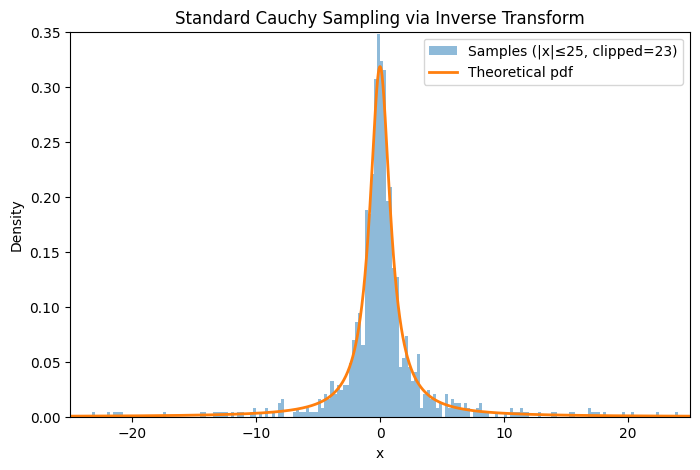

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def cauchy_inverse_cdf(u):
    u = np.asarray(u)
    eps = np.finfo(float).eps
    u = np.clip(u, eps, 1 - eps)            # avoid ±∞
    return np.tan(np.pi * (u - 0.5))

def sample_cauchy_inverse(n, seed=None):
    rng = np.random.default_rng(seed)
    u = rng.random(n)
    return cauchy_inverse_cdf(u)

# --- Generate samples ---
n = 1000
samples = sample_cauchy_inverse(n, seed=123)

# --- Plot with a sensible window and fixed bins ---
xmax = 25                           # window for display (not for sampling)
bins = np.linspace(-xmax, xmax, 201)

# count how many samples lie outside the plotted window (heavy tails)
out = np.sum(np.abs(samples) > xmax)

x = np.linspace(-xmax, xmax, 2000)
pdf = 1 / (np.pi * (1 + x**2))      # standard Cauchy pdf; peak = 1/pi ≈ 0.318

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=bins, density=True, alpha=0.5, range=(-xmax, xmax),
         label=f"Samples (|x|≤{xmax}, clipped={out})")
plt.plot(x, pdf, lw=2, label="Theoretical pdf")
plt.xlim(-xmax, xmax)
plt.ylim(0, 0.35)                   # show the peak scale clearly
plt.title("Standard Cauchy Sampling via Inverse Transform")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- Target density: standard normal ---
def p(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# --- Proposal density: Standard Cauchy (x0=0, gamma=1) ---
def q(x):
    return 1 / (np.pi * (1 + x**2))

# --- Compute minimal k = sup_x p(x)/q(x) ---
# (We also know the closed form: k* = sqrt(2*pi) * exp(-1/2), attained at x = ±1.)

def optimal_k():
    return np.sqrt(2 * np.pi) * np.exp(-0.5)
    
k_star_cf  = optimal_k_closed_form()

print("Optimal k (closedform) =", k_star_cf)


Optimal k (closedform) = 1.5203469010662807


Now that we are able to generate $U[0,1]$, we can generate a sample for 
$g(x)$ (Laplace distribution) using the inverse CDF $G^{-1}(u)$ with $u$ 
(referred to as $y$).  

Next, we generate another $U[0,1]$ for the acceptance–rejection method.

If
$$
u < \frac{p(y)}{k q(y)},
$$
we accept $(x, p(x))$ as a valid point that is enclosed by the pdf $p(x)$.  

Else, we return to the beginning step of generating the first $U[0,1]$ and repeat the process until the generated sample for $p(y)$ is accepted.

---

Repeating this process over many samples for $p(x)$ will yield the true $p(x)$ with probability $1$ as the number of samples approaches infinity.


Using inverse transform, the mapping is deterministic, so it always requires  
exactly **1 uniform** from $U[0,1]$ to obtain a sample from $p(x)$.

---

For the acceptance–rejection step:

- The acceptance probability is $\tfrac{1}{k}$.
- The number of trials until acceptance is geometric with mean $k$.
- Each trial consumes **2 uniforms** (one for generating $g(x)$, one for the acceptance check).

Thus, let $T$ denote the total uniforms used. We have the recursion:

$$
\mathbb{E}[T] = 2 \cdot \tfrac{1}{k} \;+\; \bigl(\mathbb{E}[T] + 2\bigr)\Bigl(1 - \tfrac{1}{k}\Bigr).
$$

Solving gives

$$
\mathbb{E}[T] = 2k.
$$

---

**Summary of expected uniforms:**

\
\begin{aligned}
\text{Inverse transform for } p(x): &\quad 1 \\[6pt]
\text{Acceptance–rejection for } q(x): &\quad k \\[6pt]
\textbf{Total uniforms per accepted sample:} &\quad 2k
\end{aligned}
\\


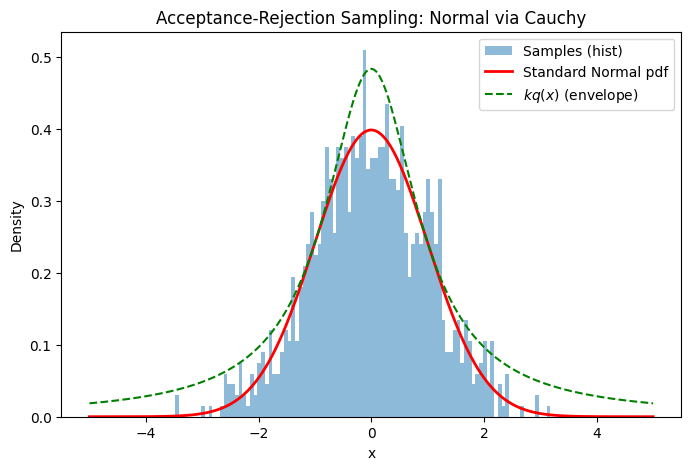

Proposals per accepted sample: mean = 1.510, 95% CI = (1.458, 1.562)
Uniforms per accepted sample : mean = 3.020, 95% CI = (2.915, 3.125)
Theoretical E[#proposals] ≈ k = 1.520
Theoretical E[#uniforms ] ≈ 2k = 3.041


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# --- Target density: standard normal ---
def p(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# --- Proposal density: Standard Cauchy (x0=0, gamma=1) ---
def q(x):
    return 1 / (np.pi * (1 + x**2))

# --- Inverse CDF sampler for Cauchy ---
def sample_cauchy(rng):
    u = rng.random()
    # inverse CDF of standard Cauchy
    return np.tan(np.pi * (u - 0.5))

# --- Optimal k: sup_x p(x)/q(x) ---
# Closed form: k* = sqrt(2π) * exp(-1/2), attained at x = ±1
k_star = np.sqrt(2 * np.pi) * np.exp(-0.5)

# --- Acceptance-Rejection Sampler (tracks proposals & uniforms) ---
def sample_normal_via_cauchy(n, k=k_star, seed=None):
    rng = np.random.default_rng(seed)
    samples = []
    attempts_per_accept = []
    uniforms_per_accept = []

    while len(samples) < n:
        attempts_this_one = 0
        while True:
            # Step 1: sample from Cauchy via inverse transform (1 uniform)
            x_prop = sample_cauchy(rng)

            # Step 2: acceptance check (1 uniform)
            u2 = rng.random()
            attempts_this_one += 1

            if u2 <= p(x_prop) / (k * q(x_prop)):
                samples.append(x_prop)
                attempts_per_accept.append(attempts_this_one)
                uniforms_per_accept.append(2 * attempts_this_one)
                break

    return (np.array(samples),
            np.array(attempts_per_accept, dtype=int),
            np.array(uniforms_per_accept, dtype=int))

# --- Example: draw samples ---
n = 1000
samples, attempts_per_accept, uniforms_per_accept = sample_normal_via_cauchy(n, k=k_star, seed=42)

# Plot histogram vs. true normal pdf and envelope
x = np.linspace(-5, 5, 500)
plt.figure(figsize=(8,5))
plt.hist(samples, bins=100, density=True, alpha=0.5, label="Samples (hist)")
plt.plot(x, p(x), "r-", lw=2, label="Standard Normal pdf")
plt.plot(x, k_star * q(x), "g--", lw=1.5, label=r"$k q(x)$ (envelope)")
plt.legend()
plt.title("Acceptance-Rejection Sampling: Normal via Cauchy")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

# --- Summary stats: mean and 95% CI ---
def mean_ci95(a):
    a = np.asarray(a)
    m = a.mean()
    s = a.std(ddof=1)
    half = 1.96 * s / np.sqrt(len(a))
    return m, (m - half, m + half)

mean_attempts, ci_attempts = mean_ci95(attempts_per_accept)
mean_uniforms, ci_uniforms = mean_ci95(uniforms_per_accept)

print(f"Proposals per accepted sample: mean = {mean_attempts:.3f}, 95% CI = ({ci_attempts[0]:.3f}, {ci_attempts[1]:.3f})")
print(f"Uniforms per accepted sample : mean = {mean_uniforms:.3f}, 95% CI = ({ci_uniforms[0]:.3f}, {ci_uniforms[1]:.3f})")

# Theoretical benchmarks
print(f"Theoretical E[#proposals] ≈ k = {k_star:.3f}")
print(f"Theoretical E[#uniforms ] ≈ 2k = {2*k_star:.3f}")
